<h1><center>Nonlinear & Nonstationary Signal Processing</center></h1>
<h2><center>by Jaidev Deshpande</center></h2>
<h3><center>Lunch & Learn, 8th August 2016</center></h3>

<div style="text-align: center">
<div id="social">
<div id="social_twitter">
    <a href="http://twitter.com/jaidevd"><img src="images/twitter-128.png" width="32" height="32">
    </a>
</div>
<div id="social_medium">
    <a href="http://medium.com/@jaidevd"><img src="images/medium.ico" width="32" height="32"></a>
</div>
<div id="social_github">
    <a href="http://github.com/jaidevd"><img src="images/mark-github-128.png" width="32" height="32"></a>
</div>
</div>
</div>

<div style="text-align: center"><font size="4"><strong>@jaidevd</strong></font></div>

# The Problem: Given a signal, find which frequency occured when.


### The classic problem: A Hard Day's Night
<iframe width="854" height="480" src="https://www.youtube.com/embed/X61f_UqIk3Q" frameborder="0" allowfullscreen></iframe>

### The Fourier Transform:

$$ F(\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt $$


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tftb.generators import fmconst
%matplotlib inline

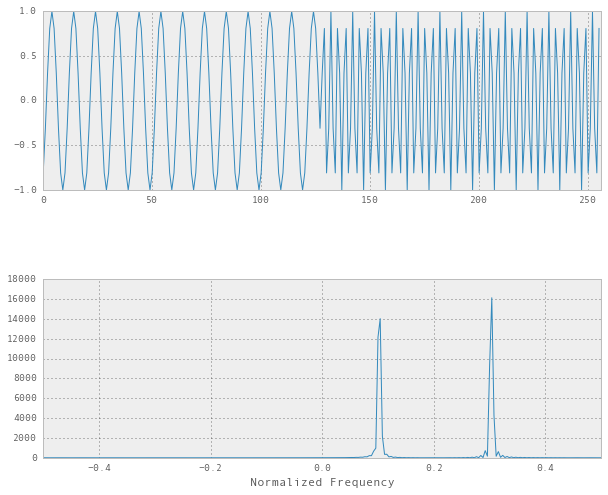

In [3]:
n_points = 128
mode1, iflaw1 = fmconst(n_points, fnorm=0.1)
mode2, iflaw2 = fmconst(n_points, fnorm=0.3)
signal = np.r_[mode1, mode2]
#plt.plot(np.real(signal))

X = np.fft.fftshift(np.fft.fft(signal))
plt.figure(figsize=(10, 8))
plt.subplot(211), plt.plot(np.real(signal)), plt.xlim(0, 256)
plt.subplot(212), plt.plot(np.linspace(-0.5, 0.5, 256), np.abs(X) ** 2)
plt.xlim(-0.5, 0.5)
plt.xlabel("Normalized Frequency")

# Time-Frequency representations of the Signal

## Short-time Fourier Transform

$$ X(\tau, \omega) = \int_{-\infty}^{\infty}x(t)w(t-\tau)e^{-j\omega t}dt$$

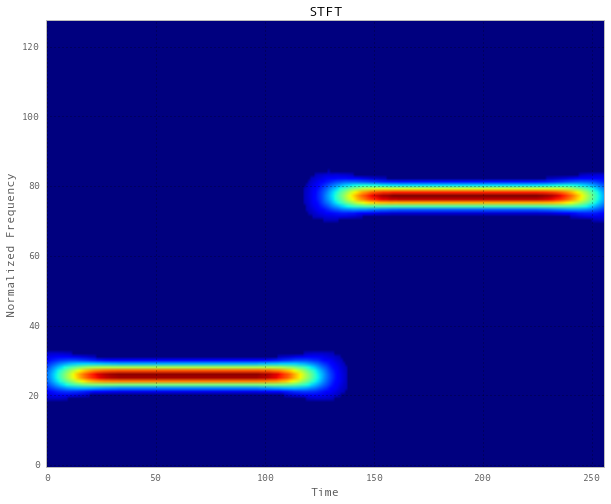

In [7]:
from tftb.processing import ShortTimeFourierTransform
stft = ShortTimeFourierTransform(signal)
stft.run()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
stft.plot(ax=ax)

![](images/intro_tf_grid.png)